<a href="https://colab.research.google.com/github/Bang-JW/kaggle_study/blob/main/kaggle_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋에 대한 설명

 - Customer care calls : 배송조회 문의전화 건수
 

# 머신러닝까지 봤을 때

 - 어떤 상품이 제때 도착할까에 대한 예측(kaggle을 참조했습니다)

In [21]:
! pip install category_encoders

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Data Load 및 Index 설정

In [23]:
# 고객의 ID를 인덱스로 설정

data = pd.read_csv('data.csv')

In [24]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [25]:
# ID 컬럼 drop
data = data.drop('ID', axis = 1)

In [26]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


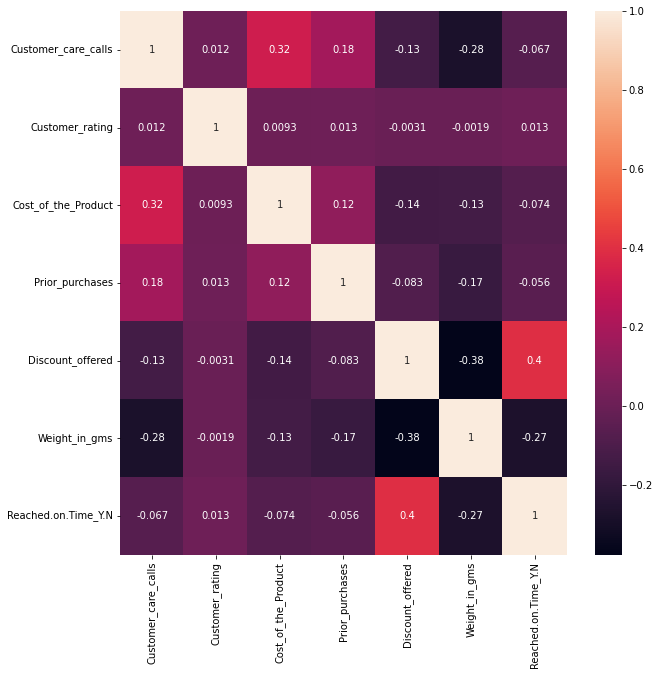

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

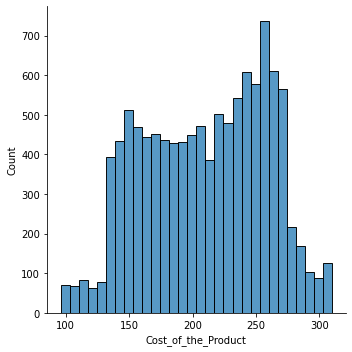

In [28]:
# 상품의 가격대 분포
sns.displot(data['Cost_of_the_Product'])

# 무게에 따라서 운송수단이 달라지는 가?

In [29]:
flight_data = data[data['Mode_of_Shipment']=='Flight']
road_data = data[data['Mode_of_Shipment']=='Road']
ship_data = data[data['Mode_of_Shipment']=='Ship']

In [30]:
flight_data = flight_data.loc[:,['Weight_in_gms']]
road_data = road_data.loc[:,['Weight_in_gms']]
ship_data = ship_data.loc[:,['Weight_in_gms']]

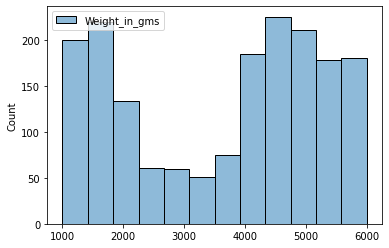

In [31]:
sns.histplot(flight_data)

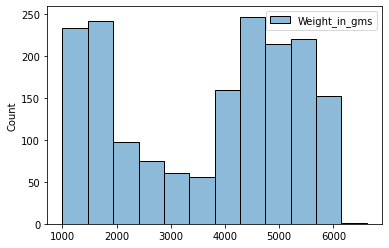

In [32]:
sns.histplot(road_data)

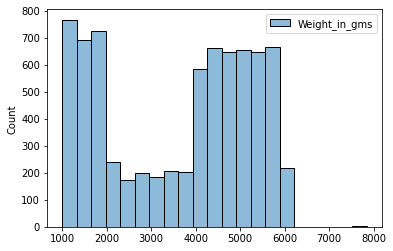

In [33]:
sns.histplot(ship_data)

- 그래프 상으로는 거의 차이가 없는 데 이걸 통계적으로 뭘로 증명하면 좋을 지 

# ML Part 1 상품이 제 때 도착하는 것에 대한 예측

 - 상품이 제 때 도착하는 것에 대한 예측
 - feature : 'Customer_care_calls', 'Customer_rating', 'Cost_of_Product', 'Discount_offered', 'Product_importance', 'Discount_offered'
 - target : 'Reached_on_Time_Y.N' 

In [34]:
# featurn 및 target 설정

feature = [ 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Discount_offered', 'Product_importance']
target = data.columns[-1]

In [35]:
X = data[feature]
y = data[target]

In [36]:
# 기준모델 
data['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [38]:
X_train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Discount_offered,Product_importance
571,4,1,132,63,low
5280,6,5,261,3,low
3842,5,4,172,5,low
6004,6,1,255,5,low
2550,3,1,178,11,low
...,...,...,...,...,...
10477,5,1,248,3,low
3486,3,4,201,6,low
3873,4,5,216,1,medium
6759,5,2,192,7,high


In [39]:
randomforest_pipeline = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(max_depth = 10)
)

randomforest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Product_importance'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10))])

In [40]:
randomforest_pipeline.score(X_train, y_train)

0.7857711103534493

In [41]:
randomforest_pipeline.score(X_test, y_test)

0.6204545454545455

In [42]:
y_pred = randomforest_pipeline.predict(X_test)

In [43]:
acc = accuracy_score(y_test, y_pred)
print("정확도 : {:.2f}".format(acc))

정확도 : 0.62


# ML Part 2 운송수단, 창고별 가격 예측

 - 운송수단과 창고 위치에 따른 가격 예측


In [44]:
# Data 준비

linreg_data = data.loc[:,['Mode_of_Shipment', 'Warehouse_block', 'Cost_of_the_Product']]

In [45]:
linreg_data

,Mode_of_Shipment,Warehouse_block,Cost_of_the_Product
0,Flight,D,177
1,Flight,F,216
2,Flight,A,183
3,Flight,B,176
4,Flight,C,184
...,...,...,...
10994,Ship,A,252
10995,Ship,B,232
10996,Ship,C,242
10997,Ship,F,223


In [46]:
feature = ['Mode_of_Shipment', 'Warehouse_block']
target = ['Cost_of_the_Product']

X = linreg_data[feature]
y = linreg_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [47]:
onehot_enc = OneHotEncoder(use_cat_names=True)
X_train_encoded = onehot_enc.fit_transform(X_train)
X_test_encoded = onehot_enc.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train_encoded, y_train)

LinearRegression()

In [49]:
y_pred = linreg.predict(X_test_encoded)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test, y_pred)) 
print(mean_squared_error(y_test, y_pred)) 

-0.0007733621215724185
2258.769872159091


# ML Part3 column 다 포함해서 제 시간에 도착하는지에 대한 여부 예측

In [51]:
# 기준모델 
data['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [52]:
feature =data.columns[:-1]
target = data.columns[-1]

X = data[feature]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [53]:
randomforest_pipeline = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(max_depth = 5)
)

randomforest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Warehouse_block', 'Mode_of_Shipment',
                                     'Product_importance', 'Gender'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

In [54]:
randomforest_pipeline.score(X_train, y_train)

0.6989430617115582

In [55]:
randomforest_pipeline.score(X_test, y_test)

0.6704545454545454

# 중요도에 따른 가격예측

In [56]:
importance_data = data.loc[:,['Product_importance', 'Cost_of_the_Product']]

In [57]:
importance_data

,Product_importance,Cost_of_the_Product
0,low,177
1,low,216
2,low,183
3,medium,176
4,medium,184
...,...,...
10994,medium,252
10995,medium,232
10996,low,242
10997,medium,223


In [58]:
importance_data['Cost_of_the_Product'].mean()

210.19683607600692

In [59]:
feature = ['Product_importance']
target = ['Cost_of_the_Product']

X = importance_data[feature]
y = importance_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

In [60]:
X_train

,Product_importance
1812,medium
5410,medium
977,medium
10948,low
2569,medium
...,...
3402,low
10481,low
10637,low
1924,low


In [61]:
onehot_enc = OneHotEncoder(use_cat_names=True)
X_train_encoded = onehot_enc.fit_transform(X_train)
X_test_encoded = onehot_enc.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train_encoded, y_train)

LinearRegression()

In [63]:
y_pred = linreg.predict(X_test_encoded)

In [64]:
y_pred = pd.DataFrame(y_pred, columns = ['Prediction'])

In [65]:
y_pred

,Prediction
0,203.500000
1,211.453125
2,209.890625
3,209.890625
4,211.453125
...,...
2195,203.500000
2196,209.890625
2197,211.453125
2198,211.453125


In [66]:
y_test

,Cost_of_the_Product
7009,169
10340,287
9165,227
2986,236
10760,218
...,...
1013,178
8921,250
2893,226
6222,276
